In [110]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [111]:
cluster_size = 50
blur = 1

In [112]:
A = [  1, 1 ]
B = [ -3, 1 ]
C = [  3, 3 ]

In [113]:
a = [ A[0]+np.random.randn(cluster_size)*blur , A[1]+np.random.randn(cluster_size)*blur ]
b = [ B[0]+np.random.randn(cluster_size)*blur , B[1]+np.random.randn(cluster_size)*blur ]
c = [ C[0]+np.random.randn(cluster_size)*blur , C[1]+np.random.randn(cluster_size)*blur ]
print(a)

[array([ 1.43079687,  1.01863266,  0.12320689,  1.50983889,  0.95619446,
        2.50146943,  2.13974995,  3.11912457, -0.02828325,  0.58499341,
        2.16401065,  1.38486632,  0.95475747, -1.82078334,  1.47434428,
        0.16371703, -0.78785869,  1.93717971,  3.78294032,  0.9076028 ,
        0.27147344,  1.80516474,  0.7511874 , -1.31343633,  1.54426344,
        0.90147948,  0.50718311,  1.49389545,  1.21344283,  2.55820013,
        0.08427162,  2.20077428, -0.56547378, -0.14613593,  0.34350259,
        2.03462197,  2.15429651,  0.89860211,  0.86245435,  0.90713541,
        0.04125617,  3.83914453,  0.67830025,  0.29599627,  0.14963209,
        1.81101435,  0.60651057,  0.8641094 ,  0.22576305,  0.70677788]), array([ 0.77493995,  0.31715812,  0.84097789,  1.78396474,  1.70270639,
        1.76714637,  1.07231546,  0.40941912,  0.27231215,  0.92675502,
       -0.05447642,  0.24163356, -0.25699965,  0.41921078,  0.27128553,
        1.7977775 , -0.01872846,  1.351914  ,  1.13258609,  1

In [114]:
data = np.transpose(np.concatenate((a,b,c), axis=1))
print(data)

[[ 1.43079687  0.77493995]
 [ 1.01863266  0.31715812]
 [ 0.12320689  0.84097789]
 [ 1.50983889  1.78396474]
 [ 0.95619446  1.70270639]
 [ 2.50146943  1.76714637]
 [ 2.13974995  1.07231546]
 [ 3.11912457  0.40941912]
 [-0.02828325  0.27231215]
 [ 0.58499341  0.92675502]
 [ 2.16401065 -0.05447642]
 [ 1.38486632  0.24163356]
 [ 0.95475747 -0.25699965]
 [-1.82078334  0.41921078]
 [ 1.47434428  0.27128553]
 [ 0.16371703  1.7977775 ]
 [-0.78785869 -0.01872846]
 [ 1.93717971  1.351914  ]
 [ 3.78294032  1.13258609]
 [ 0.9076028   1.70423048]
 [ 0.27147344  2.09898047]
 [ 1.80516474  1.98313774]
 [ 0.7511874   2.50589937]
 [-1.31343633 -0.55902276]
 [ 1.54426344  1.48241959]
 [ 0.90147948  0.6437841 ]
 [ 0.50718311 -0.10148231]
 [ 1.49389545  0.0073206 ]
 [ 1.21344283  0.95250395]
 [ 2.55820013 -0.70605114]
 [ 0.08427162  2.02961691]
 [ 2.20077428  2.07441944]
 [-0.56547378  0.09237321]
 [-0.14613593  2.13303378]
 [ 0.34350259  1.07855627]
 [ 2.03462197  0.70928823]
 [ 2.15429651  0.45925408]
 

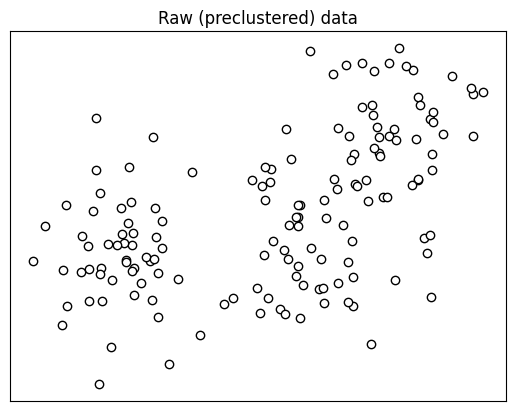

In [115]:
plt.plot(data[:,0],data[:,1],'ko',markerfacecolor='w')
plt.title('Raw (preclustered) data')
plt.xticks([])
plt.yticks([])
plt.show()

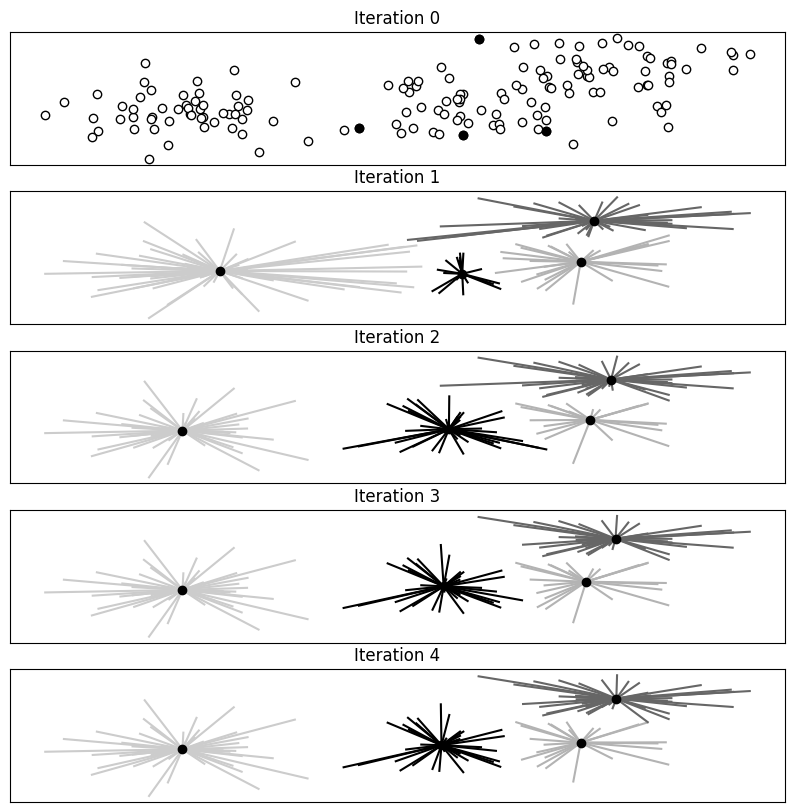

In [116]:
k = 4 # extract three clusters

ridx = np.random.choice(range(len(data)),k,replace=False)
centroids = data[ridx,:]

fig,axs = plt.subplots(k + 1,1,figsize=(10,10))
axs = axs.flatten()
lineColors = [ [0,0,0],[.4,.4,.4],[.8,.8,.8], [.7,.7,.7] ]#'rbm'

axs[0].plot(data[:,0],data[:,1],'ko',markerfacecolor='w')
axs[0].plot(centroids[:,0],centroids[:,1],'ko')
axs[0].set_title('Iteration 0')
axs[0].set_xticks([])
axs[0].set_yticks([])

for iteri in range(k):
  
  dists = np.zeros((data.shape[0],k))
  for ci in range(k):
    dists[:,ci] = np.sum((data-centroids[ci,:])**2,axis=1)
        
  # step 2: assign to group based on minimum distance
  groupidx = np.argmin(dists,axis=1)
    
  # step 3: recompute centers
  for ki in range(k):
    centroids[ki,:] = [ np.mean(data[groupidx==ki,0]), np.mean(data[groupidx==ki,1]) ]
    
  # plot data points
  for i in range(len(data)):
    axs[iteri+1].plot([ data[i,0],centroids[groupidx[i],0] ],[ data[i,1],centroids[groupidx[i],1] ],color=lineColors[groupidx[i]])

  axs[iteri+1].plot(centroids[:,0],centroids[:,1],'ko')
  axs[iteri+1].set_title(f'Iteration {iteri+1}')
  axs[iteri+1].set_xticks([])
  axs[iteri+1].set_yticks([])